# COGS 108 - Final Project

# Overview

College Ranking and Major: Does it actually matter?

For many people, college is a pivotal point in their lives. Where people choose to attend college, along with what major they choose to pursue, are both important decisions that people have to make. For this project, our team wanted to see if there was truly a correlation between education, major, and income, and if so, how much it would affect people in the long term. Our team believes that while the rank and admissions rate of a college, as well as major are important for starting salary, these factors will become less important as one grows older and moves further along in their career.

# Names and Group Member IDs

    Beverly Li                   A13523828

    Jiahao Wang                  A13052734  

    Daniel Li                    A15041127

    Saurabh Kanhegaonkar         A15286869  

    Jenny Li                     A14611173

# Research Question

Does the $prestige^{1}$ of a $college^{2}$ and one’s major affect one’s future $income^{3}$ in the United States? 

1 Because is hard to quantify prestige, we decided to look at both the college’s national ranking and admission rate. 

2 Our data does not distinguish between undergraduate and graduate programs

3 We define future income in regards to starting salary and mid-career salary 

# Background and Prior Work

In today’s society, many people place a huge emphasis on attending a top university. In fact, a couple of months back, it was found that a group of wealthy parents, including prominent actresses Lori Loughlin and Felicity Huffman, have been bribing college officials to get their children into top ranked colleges. People tend to associate well-renowned and prestigious universities with higher success, and therefore more money. However, because it is hard to quantity prestige, our group decided to use both a college’s national ranking and its admission rate. A college’s national ranking is often the go-to indicator for prestige, but it can be subjective, since colleges can have a different ranking depending on what factors are being prioritized. Admission rate refers to the percentage of how many people get in out of the total amount of people who apply. When a college has a low admission rate, it means that it is more selective, and thus would have higher prestige. Ultimately, we decided to add this on because it would be a more neutral indicator of a college’s prestige. 

We expect that those who study in the STEM field will pursue a high-paying job after they graduate, such as a doctor or an engineer. There is currently a negative stigma around majoring in the humanities because of a low earning potential. In the past decade, studies have shown that there has been a drastic increase in STEM majors and a rapid decline in humanities majors. Thus, our hypothesis is based on these two findings.

We also want to clarify and state that the distinction between undergraduate and graduate degrees is insignificant because we are looking at starting and mid-career salary of students. Essentially, we only care about how much money people make when they start their career, rather than how much they make directly out of undergrad. 

A previous COGS108 project concluded that college is generally worth attending, as the average high school graduate earnings have been steadily declining since 1995. Keeping this in mind, we would like to further explore this topic of how education affects one’s prospective income. More specifically, we are interested in how a person’s university’s ranking and and major correlates to their prospective income. 

    References (include link)

1) https://www.washingtonpost.com/education/2019/04/03/felicity-huffman-lori-loughlin-other-parents-charged-admissions-scheme-set-appear-boston-federal-court/?noredirect=on

2) https://www.economicmodeling.com/2017/09/01/stem-majors-accelerating-every-state-just-humanities-degrees-declining/

3) https://github.com/COGS108/FinalProjects-Sp17/blob/master/081-FinalProject.ipynb?fbclid=IwAR3CWw2rNABc-ZGR7Q0K47P4FP_gOyd7oOhEJ0hOPbkXRjk5nIEy-KqS0HU


# Hypothesis

We hypothesize that attending a prestigious university and selecting a major in Science, Technology, Engineering, and Mathematics will lead to higher income. However, we believe that the prestige of a school, as well as the major chosen, will have less of an impact on salary as people move forward in their career. We think this because when a person is in the workforce longer, their skills and experience should matter more than their major and the college that they attended.

# Datasets

1-2 sentences describing each dataset.
If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets

1) US Dept of Education: College Scorecard: https://collegescorecard.ed.gov/data/

    Dataset: Most-Recent-Cohorts-All-Data-Elements.csv

Curated by the US Department of Education, this college scorecard dataset contains about ~ 7000 observations of undergraduate level students for each year from 1996-2017 from several universities across the United States with variables like Institution Name, Cost of Tuition, Degree Completion, Undergraduate Major, Student Debt and Earnings out of college. The first dataset includes the data in several csv files according to the year they were obtained in.

2) Where it Pays to Attend College: https://www.kaggle.com/wsj/college-salaries

    Datasets: degrees-that-pay-back.csv (college salaries by major), 
    salaries-by-region.csv (college salaries by region)

Salaries by college, region, and academic major: This data is obtained from the Wall Street Journal based on data from Payscale, Inc. The dataset contains variables such as Undergraduate Major, School Name with their respective Median salary at different career points and percentiles. The dataset is split between three types of data: salaries by major, by college and by region. The files contain about 50, 270 and 320 data points respectively. 

3) World University Rankings: https://www.kaggle.com/mylesoneill/world-university-rankings

    Dataset: cwurData.csv

This dataset uses 3 different ranking systems, one from Times, one from Shanghai, and one from Saudi Arabia. For our project we decided to use the Academic Ranking of World Universities from Shanghai which has 1000 data points from 2012-2015. It describes the best universities by ranking globally and nationally, quality of instruction, publications, influence, and more, but has been criticized for undervaluing the humanities and may introduce some bias in our results.

Since we use 1 dataset for rankings, 1 dataset for information about different majors, and 1 dataset with admission rates, we plan to combine these datasets to evaluate the relationships between admission rates and salary, major and salary, and ranking and salary.


# Setup

In [17]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import scipy.stats as stats

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 11
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 3)

# for graphs 1-2
all_data_elem = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv",\
                                                    low_memory=False)
df_all_data = pd.DataFrame(all_data_elem)

df_all_data = df_all_data[['INSTNM','UNITID', 'ADM_RATE', 'HIGHDEG']]

# for graphs 3-5
majors_data = pd.read_csv('degrees-that-pay-back.csv')

# for graphs 6-7
rankings = pd.read_csv("cwurData.csv")
df_rank = pd.DataFrame(rankings)
df_rank = df_rank[['institution', 'country', 'national_rank']]

small_data_elem = pd.read_csv("salaries-by-region.csv", low_memory=False)
df_small_data = pd.DataFrame(small_data_elem)
df_small_data = df_small_data[['School Name', 'Starting Median Salary',\
                               'Mid-Career Median Salary']]

# Data Cleaning

Disclaimer: some schools are not in both datasets, resulting in missing ranks in the graphs

In [18]:
# clean data for graphs 6-7
# standardize institution names for more matches between datasets
def fix_name(name):
    name = name.lower().strip()
    if '(' in name:
        name = name[:name.find('(')] + name[name.find(')')+1:]
    name = name.replace(' ', '')
    name = name.replace(',', '')
    name = name.replace('-', '')
    name = name.replace('.', '')
    name = name.replace('â€“', '')
    name = name.replace('the', '')
    name = name.replace('&', '')
    name = name.replace('and', '')
    name = name.replace('of', '')
    name = name.replace('at', '')
    return name

# manually match schools that could not be fixed with a general function (40 schools)
def align_name():
    df_rank.loc[220, 'School Name'] = 'University of Michigan'
    df_rank.loc[224, 'School Name'] = 'University of Wisconsin (UW) - Madison'
    df_rank.loc[227, 'School Name'] = \
                           'University of Illinois at Urbana-Champaign (UIUC)'
    df_rank.loc[228, 'School Name'] = 'University of Texas (UT) - Austin'
    df_rank.loc[231, 'School Name'] = 'University of Washington (UW)'
    df_rank.loc[232, 'School Name'] = 'Rutgers University'
    df_rank.loc[245, 'School Name'] = 'Pennsylvania State University (PSU)'
    df_rank.loc[246, 'School Name'] = 'Ohio State University (OSU)'
    df_rank.loc[248, 'School Name'] = 'University of Minnesota'
    df_rank.loc[251, 'School Name'] = 'Purdue University'
    df_rank.loc[304, 'School Name'] = 'Texas A&M University'
    df_rank.loc[312, 'School Name'] = 'Indiana University (IU), Bloomington'
    df_rank.loc[372, 'School Name'] = 'University of South Florida (USF)'
    df_rank.loc[382, 'School Name'] = 'University of Maryland Baltimore County (UMBC)'
    df_rank.loc[395, 'School Name'] = 'University of Missouri - Columbia'
    df_rank.loc[407, 'School Name'] = 'University of Massachusetts (UMass) - Amherst'
    df_rank.loc[415, 'School Name'] = 'Louisiana State University (LSU) '
    df_rank.loc[426, 'School Name'] = 'University of Tennessee'
    df_rank.loc[434, 'School Name'] = 'University of Oklahoma'
    df_rank.loc[438, 'School Name'] = 'University of Texas at San Antonio (UTSA)'
    df_rank.loc[461, 'School Name'] = 'Colorado State University (CSU)'
    df_rank.loc[467, 'School Name'] = 'State University of New York (SUNY) at Buffalo'
    df_rank.loc[495, 'School Name'] = 'Washington State University (WSU)'
    df_rank.loc[497, 'School Name'] = 'University of South Carolina'
    df_rank.loc[534, 'School Name'] = 'University of Nebraska'
    df_rank.loc[564, 'School Name'] = 'Oklahoma State University'
    df_rank.loc[568, 'School Name'] = 'State University of New York (SUNY) at Albany'
    df_rank.loc[640, 'School Name'] = 'University of Mississippi '
    df_rank.loc[668, 'School Name'] = 'University of Hawaii'
    df_rank.loc[676, 'School Name'] = 'University of Arkansas'
    df_rank.loc[736, 'School Name'] = 'University of Wisconsin (UW) - Milwaukee'
    df_rank.loc[758, 'School Name'] = 'University of Missouri - Kansas City (UMKC)'
    df_rank.loc[803, 'School Name'] = 'University of Montana'
    df_rank.loc[901, 'School Name'] = 'University Of Maine'
    df_rank.loc[919, 'School Name'] = 'University of Missouri - St. Louis (UMSL)'
    df_rank.loc[932, 'School Name'] = 'University of Alabama at Huntsville (UAH)'
    df_rank.loc[945, 'School Name'] = 'University of North Dakota'
    df_rank.loc[1012, 'School Name'] = 'University of Massachusetts (UMass) - Lowell'
    df_rank.loc[1046, 'School Name'] = 'University of Massachusetts (UMass) - Boston'
    
def align_adm_name():  
    df_adm.loc[135, 'School Name'] = 'columbiauniversityincitynewyork'
    df_adm.loc[42, 'School Name'] = 'universitymichiganannarbor'
    df_adm.loc[17, 'School Name'] = 'universitywashingtonsetlecampus'
    df_adm.loc[145, 'School Name'] = 'rutgersuniversitynewbrunswick'
    df_adm.loc[77, 'School Name'] = 'universityvirginiamaincampus'
    df_adm.loc[151, 'School Name'] = 'pennsylvaniasteuniversityworldcampus'
    df_adm.loc[51, 'School Name'] = 'ohiosteuniversitymaincampus'
    df_adm.loc[48, 'School Name'] = 'universityminnesotwincities'
    df_adm.loc[43, 'School Name'] = 'purdueuniversitymaincampus'
    df_adm.loc[75, 'School Name'] = 'georgiainstitutetechnologymaincampus'
    df_adm.loc[79, 'School Name'] = 'texasamuniversitycollegestion'
    df_adm.loc[20, 'School Name'] = 'arizonasteuniversitytempe'
    df_adm.loc[19, 'School Name'] = 'universitycoloradodenver/anschutzmedicalcampus'
    df_adm.loc[118, 'School Name'] = 'universitysouthfloridamaincampus'
    df_adm.loc[26, 'School Name'] = 'newmexicosteuniversitymaincampus'
    df_adm.loc[87, 'School Name'] = \
                               'louisianasteuniversityagriculturalmechanicalcollege'
    df_adm.loc[110, 'School Name'] = 'universitytennesseeknoxville'
    df_adm.loc[80, 'School Name'] = 'tulaneuniversitylouisiana'
    df_adm.loc[94, 'School Name'] = 'universityoklahomanormancampus'
    df_adm.loc[27, 'School Name'] = 'coloradosteuniversityfortcollins'
    df_adm.loc[155, 'School Name'] = 'sunybuffaloste'
    df_adm.loc[116, 'School Name'] = 'universitysouthcarolinacolumbia'
    df_adm.loc[55, 'School Name'] = 'universitynebraskalincoln'
    df_adm.loc[101, 'School Name'] = 'oklahomasteuniversitymaincampus'
    df_adm.loc[144, 'School Name'] = 'sunyalbany'
    df_adm.loc[99, 'School Name'] = 'universityalabama'
    df_adm.loc[156, 'School Name'] = 'universitynewhampshiremaincampus'
    df_adm.loc[15, 'School Name'] = 'brighamyounguniversityprovo'
    df_adm.loc[64, 'School Name'] = 'ohiouniversitymaincampus'
    df_adm.loc[25, 'School Name'] = 'universitynewmexicomaincampus'
    df_adm.loc[32, 'School Name'] = 'universityhawaiimanoa'
    df_adm.loc[68, 'School Name'] = 'universityakronmaincampus'
    df_adm.loc[31, 'School Name'] = 'montanasteuniversity'
    df_adm.loc[71, 'School Name'] = 'kentsteuniversitykent'
    df_adm.loc[54, 'School Name'] = 'universitymissouricolumbia'
    df_adm.loc[96, 'School Name'] = 'universityalabamainhuntsville'
    df_adm.loc[67, 'School Name'] = 'bowlinggreensteuniversitymaincampus'

df_rank = df_rank.dropna()
df_rank = df_rank[200:1200]
df_rank = df_rank[df_rank['country'] == 'USA']
df_rank.rename(columns={'institution':'School Name'}, inplace=True)
align_name()
df_rank['School Name'] = df_rank['School Name'].apply(fix_name)

df_small_data = df_small_data.dropna()
df_small_data['School Name'] = df_small_data['School Name'].apply(fix_name)

df_merged = pd.merge(df_small_data, df_rank, on='School Name')
df_merged = df_merged.sort_values(by=['national_rank'])

df_merged['Starting Median Salary'] = df_merged['Starting Median Salary'].str[1:]
df_merged['Starting Median Salary'] = \
                        df_merged['Starting Median Salary'].str.replace(',', '')
df_merged['Starting Median Salary'] = \
            pd.to_numeric(df_merged['Starting Median Salary'], downcast='signed')
df_merged.to_csv("merged.csv")


To create these graphs, we obtained the data from:

    Name: salaries-by-region.csv

    Extracted Data: School Name, Starting Median Salary, Mid-Career Median Salary

    Preprocessing: dropping all NaN, removing the ‘$’ and ‘,’ in salaries so python could 
    convert it to a number
    
    Name: cwurData.csv

    Extracted Data: institution, country, national_rank

    Preprocessing: Separating data from different ranking systems, dropping all NaN, dropping 
    all universities that are not in the US, and changing the column name from ‘institution’
    to ‘School Name’

For these 2 graphs, we drew data from cwurData.csv to know more about school rankings in America and we drew data from salaries-by-region.csv to know more about the starting median and mid-career median salaries of students from those schools.  To clean the data for these graphs, we had to first drop all rows which had NaN for a value in the dataframe for rank and in the dataframe for salary. The rank data frame had 3 different ratings for each school, so we had to choose a portion of the whole data (about 1000 different schools globally) which was most representative of US rankings and remove universities that did not belong to the USA. Next, we prepared to merge the datasets for rank and salary by changing the name of a column in rank from ‘institution’ to ‘School Name’, which is what the salary data frame used. In addition, we wanted as many matches of school names between the 2 datasets, so we created methods that removed formatting and matched names manually for other naming differences. However, simply stripping from the school names did not ensured that all of the college entries matched up. To match up every datapoint, we found all the schools from the ranking dataset that were not matched, and then manually changed the school names in ranking dataset to school names that were consistent with the school names in the salary dataset. Unfortunately, from the 229 ranked school we have, only 159 were present in the salary dataset and those are the 159 schools  that are present in the graph. After merging the datasets on ‘School Name’, we also had to remove the ‘$’ and commas from the values in the salaries so pandas can read them as numbers. Finally, we are ready to graph clean data and see the trend between school ranking and salary.

In [12]:
# clean data for graphs 1-2
df_adm = df_merged
df_adm.to_csv("df_adm.csv")
align_adm_name()

df_adm['Mid-Career Median Salary'] = df_adm['Mid-Career Median Salary'].str[1:]
df_adm['Mid-Career Median Salary'] = \
                        df_adm['Mid-Career Median Salary'].str.replace(',', '')
df_adm['Mid-Career Median Salary'] =\
            pd.to_numeric(df_adm['Mid-Career Median Salary'], downcast='signed')
df_all_data.rename(columns={'INSTNM':'School Name'}, inplace=True)
df_all_data['School Name'] = df_all_data['School Name'].apply(fix_name)

df_adm_salary = pd.merge(df_all_data, df_adm, on='School Name')

To create this graph we needed data from two different sources: 

    College Scorecard from the U.S Department of Education

    Name: Most-Recent-Cohorts-All-Data-Elements.csv

    Extracted data: ‘ADM_RATE’ - college admission rate

    College Salaries from PayScale Inc.

    Name: salaries-by-region.csv

    Extracted data: ‘Starting Median Salary’, ‘Mid-Career Median Salary’

Since we were only able to plot 159/229 schools in the Ranking vs. Income graphs, for this graph we used the same 159 schools to keep the data analysis more consistent, and since admission rate data came from the U.S Department of Education, we expected the admission rate data for all 159 schools to be present. To plot admission rate against starting and mid-career median salary, we have to merge the two dataset on school names, but first, we needed to make sure that the name of the university matches up in the two datasets. To match university name across the two dataset, we first stripped all spaces, symbols, and common words (Ex: “the”, “of”, etc) from university names of both dataset. Then, we merge the two dataframe on “School Name.” However, simply stripping from the university names did not ensured that all of the university entries matched up. To match up every datapoint, we found all the schools from the college salaries dataset that were not matched, and then manually changed the school names in that data to school names that were consistent with the school names in the College Scorecard dataset. After merging the two datasets, we converted the entries in the “Starting Median Salary” and ‘Mid-career Median Salary’ column into numeric values. Finally, we are able to plot “Admission Rate” against “Starting Median Salary” and “Mid-career Median Salary.”


In [13]:
# clean data for graphs 3-5
majors_data['Starting Median Salary'] = \
                                majors_data['Starting Median Salary'].str[1:]
majors_data['Starting Median Salary'] = \
                    majors_data['Starting Median Salary'].str.replace(',', '')
majors_data['Starting Median Salary'] = \
                        pd.to_numeric(majors_data['Starting Median Salary'])
majors_data['Mid-Career Median Salary'] = \
                            majors_data['Mid-Career Median Salary'].str[1:]
majors_data['Mid-Career Median Salary'] = \
                majors_data['Mid-Career Median Salary'].str.replace(',', '')
majors_data['Mid-Career Median Salary'] =\
                    pd.to_numeric(majors_data['Mid-Career Median Salary'])
majors_data = majors_data.sort_values(by=['Starting Median Salary'])

To create these graphs, we obtained the data from one source:

    Salaries vs. Majors (degrees-that-pay-you-back) dataset from The Wall Street Journal

    The given dataset is pretty clean with small but accurate data points and the conversion 
    from strings to numeric format was the only pre-processing that was required for the dataset.

    Extracted data: Undergraduate Majors (index column), Starting Median Salary, Mid-Career 
    Median Salary and  Percent Change from Starting to Mid-Career Salary

   Before plotting the undergraduate majors vs. starting and mid-career salaries, we had to pre-process and clean the data to convert the salaries data from a human-readable format (For eg: 85,000 dollars) to a numerical representation in Python. So as to achieve this, we first stripped off the first dollar (‘$’) character from all of the Starting Median Salary and Mid-Career Median Salary columns. After this, the occurrences of the comma character (,) were replaced by a blank space (‘’) throughout these columns. Further, this processed string was passed to the to_numeric() function in Pandas and the function returned an int64 format of the salaries data. Finally, the data was sorted using the starting median salaries, mid-career salaries, and percentage change going from the lowest to the highest. Using this processed data we were able to plot the Undergraduate Majors vs. the Starting Median Salary, Undergraduate Majors vs. Mid-Career Median Salary, and Undergraduate Majors vs. Percentage Change.


# Data Analysis & Results

Starting Median Salary and Adm r value: -0.757681318118
Starting Median Salary and Adm p value: 6.6677704609e-31
Mid-Career Median Salary and Adm r value: -0.794945705126
Mid-Career Median Salary and Adm p value: 6.70068323865e-36


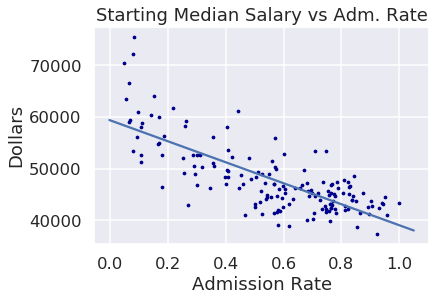

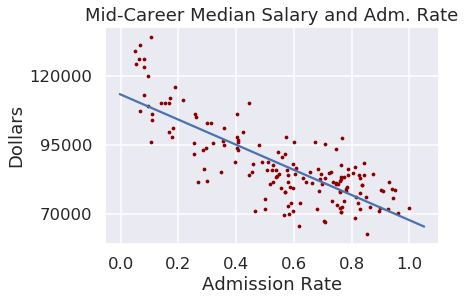

In [14]:
# first graph: starting median salary vs. admission rate
plt.scatter(df_adm_salary['ADM_RATE'], df_adm_salary['Starting Median Salary'], s=5,\
                                                                color='darkblue')
plt.title('Starting Median Salary vs Adm. Rate')
plt.xlabel('Admission Rate')
plt.ylabel('Dollars')
plt.yticks(np.arange(20000, 90000, step=10000))

# get r_value
slope, intercept, r_value, p_value, std_err = \
                                        stats.linregress(df_adm_salary['ADM_RATE'],\
                                        df_adm_salary['Starting Median Salary'])
print("Starting Median Salary and Adm r value: " + str(r_value))
print("Starting Median Salary and Adm p value: " + str(p_value))

# line of fit
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-')

# second graph: mid career median salary vs. admission rate
plt.figure(2)
plt.scatter(df_adm_salary['ADM_RATE'], df_adm_salary['Mid-Career Median Salary'],\
                                                            s=5, color='darkred')
plt.title('Mid-Career Median Salary and Adm. Rate')
plt.xlabel('Admission Rate')
plt.ylabel('Dollars')
plt.yticks(np.arange(20000, 200000, step=25000))

# get r_value
slope, intercept, r_value, p_value, std_err = \
                                        stats.linregress(df_adm_salary['ADM_RATE'], \
                                        df_adm_salary['Mid-Career Median Salary'])
print("Mid-Career Median Salary and Adm r value: " + str(r_value))
print("Mid-Career Median Salary and Adm p value: " + str(p_value))

# line of fit
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-')



Our group decided to use a linear regression approach to also visualize the admission rate  vs. starting and mid-career median salary because we wanted to find a line of best fit and see if there was going to be a correlation between these variables. To keep every consistent, we used the same 159 data points from the ranking vs. salary graphs.

For admission rate vs. starting career salary, the null hypothesis is that there is no statistical significance between admission rate and starting career salary. The alternate hypothesis is that there is a statistical significance between admission rate and starting career salary. We hypothesized that a college’s admission rate would affect one’s starting salary, with graduates of a higher ranked college earning more money when they enter into the workforce. Our alpha value was 0.01, and our p value was 6.17211106205e-31, which is less than 0.01, so we are able to reject the null hypothesis, and determine that admission rate  is statistically significant for starting salary. 

Our hypothesis was supported because the r value is -0.7580, indicating a strong negative association between admission rate and starting median salary.  In other words, graduates of colleges with low admission rates tend to make more money right out of college than graduates of colleges with high admission rates. More specifically, Stanford University, the college with the lowest admission rate, boasts a starting salary of 70,400 dollars, while University of Texas - El Paso, the college with the highest admission rate, had a starting salary of 43,400 dollars. Furthermore, the starting incomes range from 37,300 dollars for University of Montana (92.4% admission rate) to 75,000 dollars for California Institute of Technology (8.07% admission rate). There were also no outliers in this data.

For admission rate vs. mid career salary, the null hypothesis is that there is no statistical significance between admission rate and mid-career salary. The alternate hypothesis is that there that admission rate is statistically significant for mid-career salary. Before analyzing this data, we hypothesized that admission rate would not affect mid-year median salary because people were in the workforce longer. Our alpha value was 0.01, and our p value was 5.27063987026e-36, which is less than 0.01, so we reject the null hypothesis, and determine that ranking is statistically significant for starting salary. 
Our hypothesis was not supported because we found an r value of -0.7956, indicating a strong negative association between admission rate and mid-career median salary. In other words, graduates of colleges with low admission rates tend to make more money mid-career than graduates of colleges with high admission rates. More specifically,  Stanford University,  the college with the lowest admission rate, boasts a mid-career salary of 129,000 dollars, while University of Texas - El Paso, the college with the highest admission rate, had a mid-career salary of 72,100 dollars. Furthermore, the mid-career incomes range from 62,600 dollars for Kent State University (85.36% admission rate) to 134,000 dollars for Dartmouth College (10.6% admission rate). There were also no outliers in this data. 

Once again, from these two graphs, although we cannot definitely prove that a college’s admission rate would affect mid-career more than starting salary, we can conclude that there is a stronger correlation between admission rate and mid-career salary compared to admission rate and starting salary. This is because the r value for the former is -0.6567, while the r value for the latter is -0.6015. Furthermore, it appears that the ranges of income have simply just increased for mid-career salary, as it is $33,700  higher than the range of starting career salary. 


Text(0, 0.5, 'Percent Change')

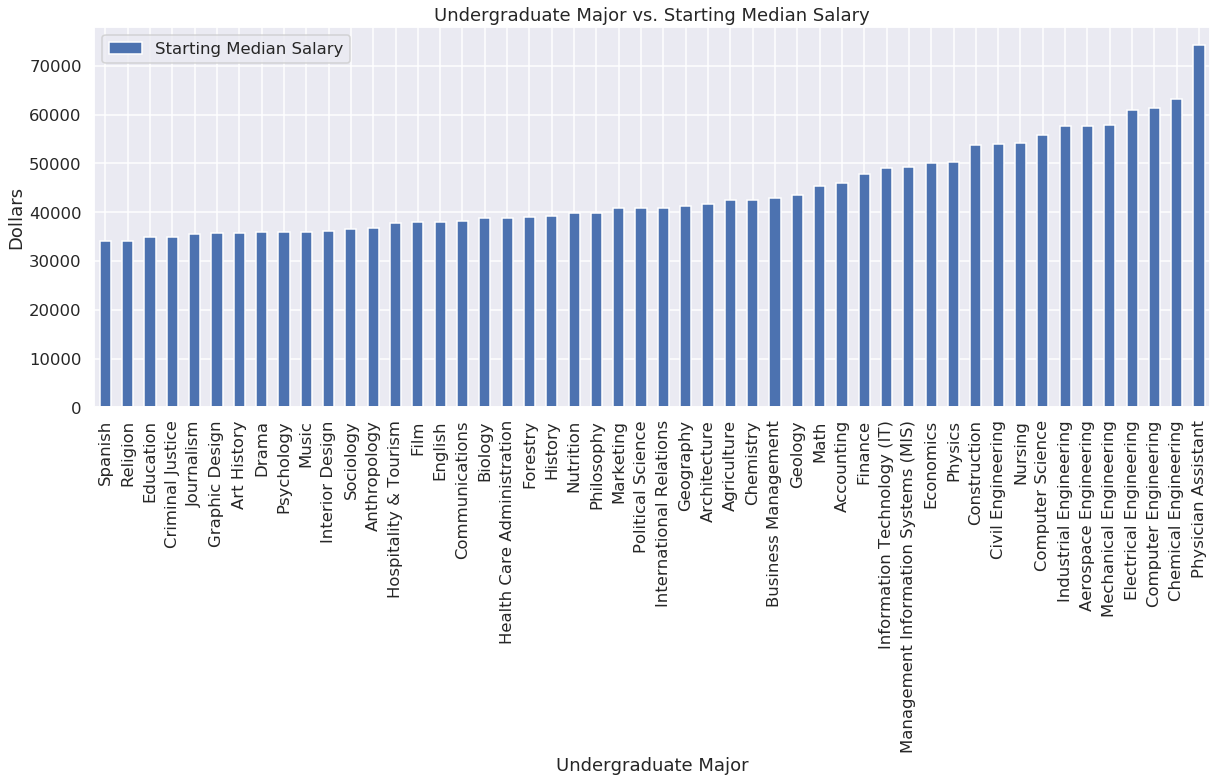

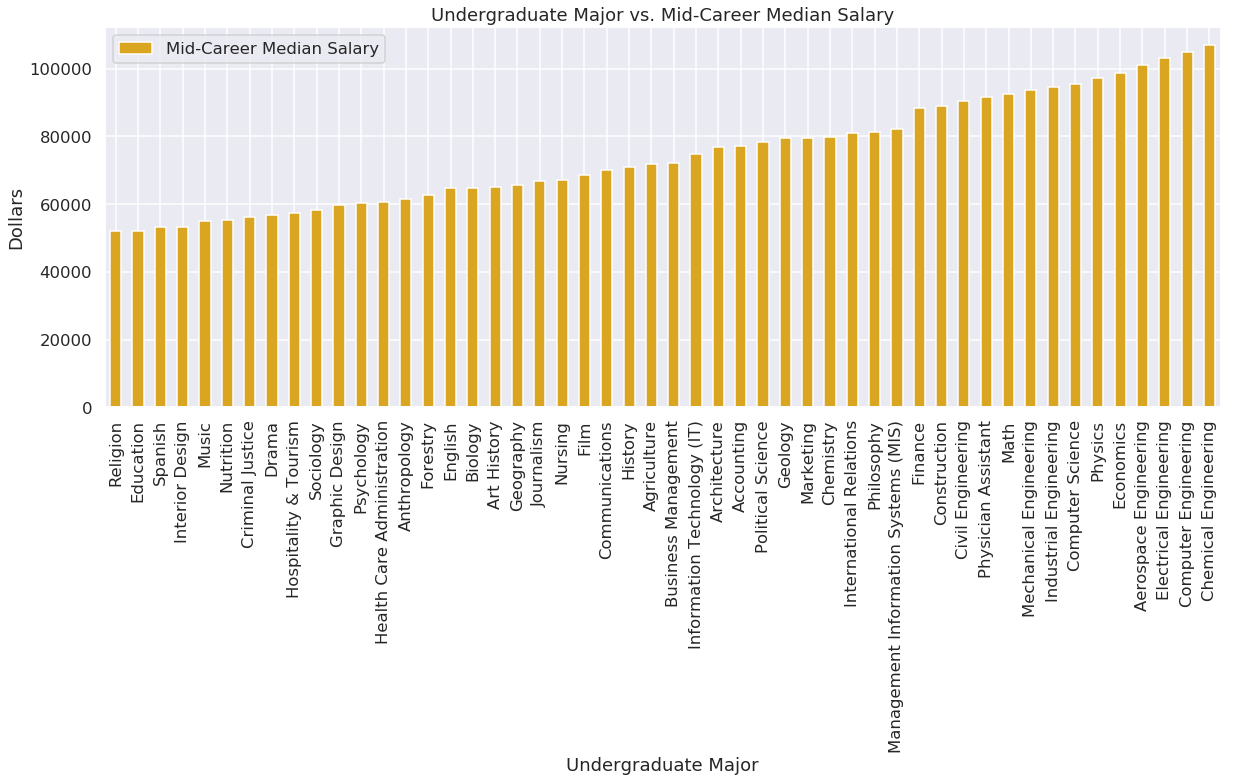

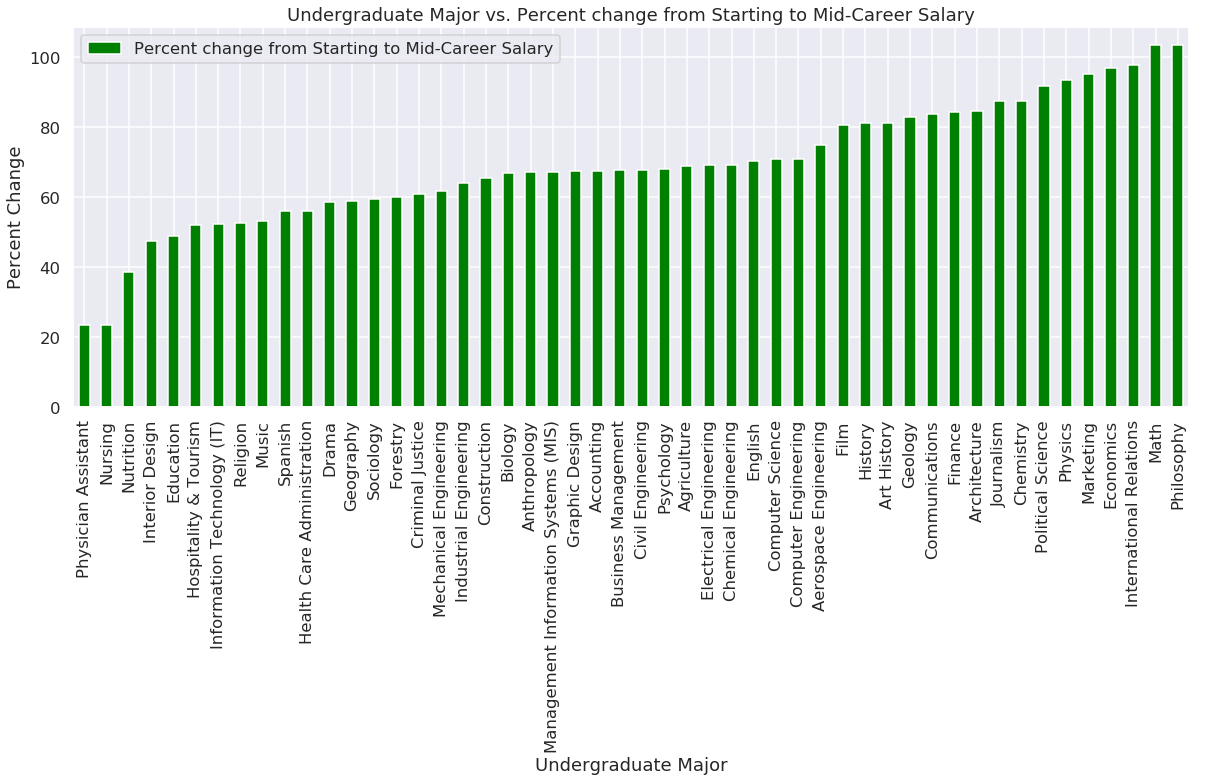

In [15]:
# third graph: starting median salary vs major
ms_plot = majors_data.plot(x='Undergraduate Major', y=['Starting Median Salary'],\
                        title='Undergraduate Major vs. Starting Median Salary',\
                                                   kind='bar', figsize=(20,7))
ms_plot.set_ylabel('Dollars')

majors_data = majors_data.sort_values(by=['Mid-Career Median Salary'])

# fourth graph: mid-career median salary vs major
ms_plot = majors_data.plot(x='Undergraduate Major', y=['Mid-Career Median Salary'],\
                    title='Undergraduate Major vs. Mid-Career Median Salary',\
                               kind='bar', figsize=(20,7), color='goldenrod')
ms_plot.set_ylabel('Dollars')

# fifth graph: percent change between starting salary and mid-career salaries
majors_percent_data = \
majors_data.sort_values(by=['Percent change from Starting to Mid-Career Salary'])
ms_percent_plot = majors_percent_data.plot(x='Undergraduate Major',\
                         y=['Percent change from Starting to Mid-Career Salary'],\
title='Undergraduate Major vs. Percent change from Starting to Mid-Career Salary',\
                                    kind='bar', figsize=(20,7), color=['green'])
ms_percent_plot.set_ylabel('Percent Change')

Our group used a bar graph, sorted from lowest to highest salary, to determine whether major played a factor in one’s starting income. We hypothesized that one’s major would affect one’s starting salary, with Science, Technology, Engineering, and Mathematics major graduates earning more money when they enter into the workforce. Our hypothesis was supported because when graphed from lowest to highest starting salary, the top ten highest incomes are STEM graduates. The lowest STEM major graduate was Biology, which was ranked 33 out of 50. Meanwhile, the lowest ten incomes hailed from graduates who majored in the humanities and social sciences. As such, it is evident that choosing a STEM major in college would lead to a higher starting salary. The range in this dataset is 40,300 dollars with the lowest salary at 34,000 dollars for a Spanish major and highest salary at 74,300 dollars for a Physician Assistant major. The Physician Assistant major was also the only outlier in the data.

For mid-career salary, we hypothesized that one’s major would still affect one’s mid-career median salary, with STEM graduates earning more; however, we believe that it would matter less than starting median salary. Our hypothesis was not supported completely because although the highest incomes were STEM graduates, the range was 55,000 dollars, which is 14,000 dollars more than the range for starting salary. The lowest salary was 52,000 dollars for a Religion major and the highest salary was 107,000 dollars for a Chemical Engineering major. The lowest STEM major graduate was Health Care Administration, which earned 60,600 dollars, while the highest non-STEM major was Economics, which earned 98,600 dollars. Meanwhile, the lowest ten incomes still hailed from graduates who majored in the humanities and social sciences. Further, if we look at the Majors vs. Percent Change graph, we can see that the top majors that had high percent changes from starting salaries to mid-career salaries are humanities majors like Philosophy, Marketing, International Relations, and Political Science. Despite having high percent changes, we can see that these majors do not have high mid-career salaries. For example, Philosophy major has the highest percent change of 103.5%  but still has a mid-career salary of 81,200 dollars. One explanation of high percent changes for humanities majors can be due to their low starting median salaries (Philosophy Majors have a low starting median salary of 39,900 dollars), so the difference between their mid-career and starting median is high.  Thus, this shows that despite high percentage change from starting to mid-career median salaries for majors with low starting salaries, high mid-career salaries are more dependent on high starting salaries itself. From this, it is evident that one’s major actually matters more for mid-career salary. There were no outliers in the data. 


Starting Median Salary and Rank r value: -0.601510002831
Starting Median Salary and Rank p value: 5.10162939286e-17
Mid-Career Median Salary and Rank r value: -0.656699770109
Mid-Career Median Salary and Rank p value: 5.53931475094e-21


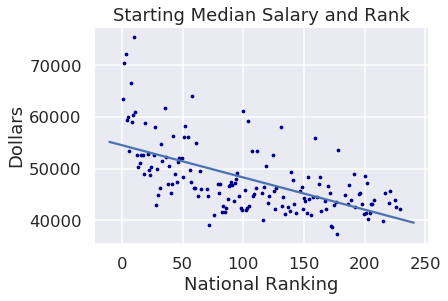

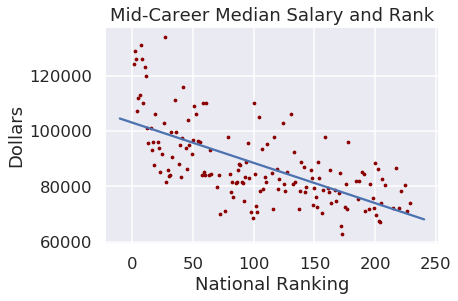

In [16]:
# sixth graph: Ranking vs. Stating Median Income
plt.figure(6)
plt.scatter(df_merged['national_rank'], df_merged['Starting Median Salary'], s=5,\
                                                                color='darkblue')
plt.title('Starting Median Salary and Rank')
plt.xlabel('National Ranking')
plt.ylabel('Dollars')
plt.yticks(np.arange(20000, 90000, step=10000))

# get r_value
slope, intercept, r_value, p_value, std_err = \
                                    stats.linregress(df_merged['national_rank'], \
                                    df_merged['Starting Median Salary'])
print("Starting Median Salary and Rank r value: " + str(r_value))
print("Starting Median Salary and Rank p value: " + str(p_value))

# line of fit
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-')

# seventh graph: mid-career median salary vs. rank
plt.figure(7)
plt.scatter(df_merged['national_rank'], df_merged['Mid-Career Median Salary'], s=5,\
                                                                    color='darkred')
plt.title('Mid-Career Median Salary and Rank')
plt.xlabel('National Ranking')
plt.ylabel('Dollars')
plt.yticks(np.arange(20000, 200000, step=20000))

# get r_value
slope, intercept, r_value, p_value, std_err =\
                                        stats.linregress(df_merged['national_rank'],\
                                            df_merged['Mid-Career Median Salary'])
print("Mid-Career Median Salary and Rank r value: " + str(r_value))
print("Mid-Career Median Salary and Rank p value: " + str(p_value))

# line of fit
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-')

Our group decided to use a linear regression approach to visualize ranking vs. starting and mid-career median salary because we wanted to find a line of best fit and see if there was going to be a correlation between these variables. The data includes 159 colleges and uses the Academic Ranking of World Universities. 

For ranking vs. starting career salary, the null hypothesis is that there is no statistical significance between ranking and starting career salary. The alternate hypothesis is that there is a statistical significance between ranking and starting career salary. We hypothesized that college ranking would affect one’s starting salary, with graduates of a higher ranked college earning more money when they enter into the workforce. Our alpha value was 0.01, and our p value was 5.1016293928574175e-17, which is less than 0.01, so we are able to reject the null hypothesis, and determine that ranking is statistically significant for starting salary. 

Our hypothesis was supported because the r value is -0.6015, indicating a medium negative association between national ranking and starting median salary.  In other words, graduates of higher ranked colleges tend to make more money right out of college than graduates of lower ranked colleges. More specifically, Harvard University, the top ranked college boasts a starting salary of 63,400 dollars, while Western Michigan University, the lowest ranked college, had a starting salary of 42,300 dollars. Furthermore, the starting incomes range from 37,300 dollars for University of Montana (rank 177) to 75,000 dollars for California Institute of Technology (rank 10). There were also no outliers in this data.

For ranking vs. mid career salary, the null hypothesis is that there is no statistical significance between college ranking and mid-career salary. The alternate hypothesis is that there that ranking is statistically significant for mid-career salary. Before analyzing this data, we hypothesized that college rankings would not affect mid-year median salary because people were in the workforce longer. Our alpha value was 0.01, and our p value was 5.539314750944098e-21, which is less than 0.01, so we reject the null hypothesis, and determine that ranking is statistically significant for mid_career salary. 

Our hypothesis was not supported because we found an r value of -0.6567, indicating a medium negative association between national ranking and mid-career median salary. In other words, graduates of higher ranked colleges still tend to make more money mid-career than graduates of lower ranked colleges. Harvard University, the top ranked college, had a mid-career salary of 124,000 dollars, while, Western Michigan University , the lowest ranked college (rank 229), had a mid-career salary of 73,800 dollars. Furthermore, it appears that the ranges of income have simply just increased, as the mid-career incomes range from 62,600 dollars for Kent State University (rank 173) to 134,000 dollars for Dartmouth College (rank 27). There were no outliers in the data. 

From these two graphs, although we cannot definitely prove that a college ranking would affect mid-career more than starting salary, we can conclude that there is a stronger correlation between college ranking and mid-career salary compared to college ranking and starting salary. This is because the r value for the former is -0.6567, while the r value for the latter is -0.6015. Furthermore, it appears that the ranges of income have simply just increased for mid-career salary, as it is 33700 dollars higher than the range of starting career salary. 


# Ethics & Privacy

There are some possible unintended consequences that our work and findings may have. We note that there is little concern with regards to privacy concerns and data use in this project, as the data sources used in this project are open and accessible to the public, and the information gathered from these sources are primarily self-reported. Our hypothesis is that a person who goes to a top ranked university and majors in STEM will have the highest income. We acknowledge that there is potentially biased data from colleges that specialize in STEM, who use income statistics to their advantage in influencing students to apply and attend their school. For example, the post-graduation income reported by the CalTech admissions website is higher than the average post-graduation income reported by other sources. To resolve this issue, our team cross-validated the numbers and statistics across multiple sources, to ensure that the numbers we used were the closest to the true values. At the same time we consider the possible ethical issue of our study having a biased preference towards STEM majors, as well as the lack of data for other majors and professions. We note and respect the importance of all majors and occupations, regardless of income, and would like to clarify that our study has no means of disregarding non-STEM majors, or implying that STEM majors are superior due to income. 

In addition, we identified a potential issue of people being uncomfortable with sharing their income, as well as what college they attended. Due to the fact that a plethora of data on education and income rely on self-reporting, we consider the possibility of skewed and inaccurate data– where people who attended more prestigious schools or have higher income are more likely to share their information, and those who have lower income may be less comfortable with sharing, or people report false information. 

Some potential biases that may have affected the data we collected include: people's' personal reasons for pursuing a STEM major or not attending a prestigious university, racial bias in the hiring process, gender bias in salaries earned, and more. It is important to consider that there is also a racial bias in the college admissions system, seen through the Harvard University Affirmative Trial court case, and in the hiring process. Studies have shown that there is an advantage of being white in hiring. There has also been a prevalent gender pay gap, where women earn 80.7 cents for every dollar a man earns.  We acknowledge the existence of such biases, and how they pose an ethical concern in the context of our study. We take into consideration the difficulties and disadvantages certain racial or socioeconomic groups face for opportunities and higher education. 

As a potential unintended negative impact, we note that the results of our study may contribute to the already prominent pressure that exists in society today to attend a highly ranked university, or pursue a career in STEM. 


# Conclusion & Discussion

For our project, we looked at the correlation between education, major and income by first plotting the global rank of a university against the starting median salary, and then against the mid-career median salary. Through this comparison, we discovered that there was not only a correlation between college ranking and salary, but that there was a stronger correlation between college ranking and mid-career salary. Since many people, as well as a multitude of college ranking systems, judge the prestige of a college or university based on the admission rate that it boasts, we decided to look into the correlation between admission rate and salary. We discovered that, like college rankings, the admissions rate of a college does have an impact on both the starting salary and mid-career salary of a student. Lastly, we inspected the correlation between major and salary, and discovered that not only does major have an impact on starting salary, but there is even more of an impact on mid-career salary. 

Through analyzing our data values and graphs, we conclude that our hypothesis is partially correct. We are correct in hypothesizing that the prestige of a school, coupled with a chosen major, has an impact on income, however, when considering all aspects of “future income,” our hypothesis that school and major would become less significant with time is proven false. Our data proved that not only is there still a correlation between education and mid-career salary, but the correlation is actually stronger than the correlation between education and starting salary. 
    
Despite our ability to reach a conclusion, we are aware that there are certain limitations in our study. These limitations include, but are not limited to, accuracy in self-reported information, and the inclusion of certain schools and majors that would contribute to a more complete dataset. We understand that our datasets, due to the methods used to obtain and compare data, are incomplete and fail to include all relevant information. However, we believe that the datasets used for our comparisons are still sufficient and valid for our analyses and reaching the conclusion that we did.
    
We acknowledge that not everyone wishes to pursue a career in STEM, or prioritizes the highest income possible. In these cases, our research question may not be as relevant. In addition, people may not necessarily consider their university for income reasons. Other reasons may include strength of major program, sense of “fit,” and location. Despite this, we still need to consider the negative impacts this work may have on society. In this study, we conclude that education and major is important for future income, and as a result, this conclusion has a negative impact by creating more pressure to attend a prestigious college/university or choose a degree in STEM. Despite the results of this study, we hope that people will still continue to pursue their passions in an environment that is good for them, rather than attend a university they do not wish to attend, or study a profession they have no interest in. 